> **Tip**: In this project, we will analyze a dataset containing information about movies from TMDb (The Movie Database). We will explore the data to answer various questions and gain insights into the trends and patterns in the movie industry.

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

With a collection of 5,000 movies from The Movie Database (TMDb), encompassing user ratings and revenue figures, exploring further for intriguing patterns within the dataset promises to unveil more captivating insights.

### Dataset Description 

> **Tip**: When initiating the presentation of your dataset, it's crucial to offer a lucid synopsis of its contents and importance. Commence by delineating the dataset's provenance and its pertinence to your investigation. Proceed by enumerating all column names within each table, elucidating their significance to aid readers in grasping the breadth of available information.


### Question(s) for Analysis
>**Tip**: Throughout this report, we will delve into the interplay between a movie's budget and its revenue, as well as uncover the prevailing genres in film production. Furthermore, we aim to investigate whether there exists a correlation between a movie's runtime and its average rating. Employing robust data analysis techniques, we will navigate through these inquiries to unveil insightful patterns within the dataset.

> **Tip**: Certainly, adhering to good coding practices enhances code maintainability and readability. Incorporating NumPy arrays, Pandas Series, and DataFrames when suitable, rather than relying solely on Python lists and dictionaries, facilitates efficient data manipulation and analysis. Moreover, employing functions aids in mitigating code redundancy and enhances overall clarity.


In [1]:
#loading necessary libraries

import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section, we'll load the data, check for any issues, and clean it for analysis. We'll document each cleaning step in markdown cells to ensure transparency and justify our decisions.


### General Properties
> **Tip**: Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell.

In [2]:
# Load your data

data = pd.read_csv('tmdb_5000_movies.csv')

<a id='wrangling'></a>
## Printing the Data's data type and dimensions

> The TMdb dataset consists of 4803 rows and 20 columns.


In [3]:
print(data.shape)

(4803, 20)


<a id='wrangling'></a>
## Printing data columns


> Printing the column names of the dataset


In [4]:
print(list(data.columns.values))

['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


<a id='wrangl'></a>
## Inspecting the first 20 rows from the dataset


> In this overview of the TMdb dataset, we start by examining the initial 20 rows, delving into each column's significance. Among the data, ID columns stand out as unique identifiers for every entry, corresponding to individual movies. Additionally, financial metrics such as budget and revenue are detailed, alongside categorical information like genre and production companies, as well as temporal data like release dates and audience ratings.


In [5]:
data.head(20)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [6]:
# To handle null values within the dataset, we utilize the isnull() function to identify them.
# Then, we employ the sum() function to count the total number of null values in each column.
data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [7]:
# To handle missing values effectively, we utilize the fillna() function to replace them with zero.
# This ensures that our dataset remains consistent and ready for further analysis.
df2=data.fillna(0)


### Data cleaning involves the removal of extraneous data from the dataset to streamline analysis and enhance efficiency.

 

In [8]:
# Ensure IPython's completer is set to be greedy

%config IPCompleter.greedy=True


In [9]:
# Following the examination of the data structure and identification of potential issues,
# the subsequent section will focus on executing the necessary cleaning procedures.

In [10]:
data = data[data["overview"].isnull() == False]
data = data[data["genres"].isnull() == False]

data = data[data.vote_average != 0]
data = data[data.vote_count != 0]

### 1- To enhance data integrity, the first step involves removing duplicate rows from the dataset.


In [11]:
# Counting the number of duplicate rows in the DataFrame
sum(df2.duplicated())

0

In [12]:

# Dropping duplicated rows from the DataFrame
df2.drop_duplicates(inplace=True)

# Displaying the shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", df2.shape)

Shape of DataFrame after removing duplicates: (4803, 20)


### 2- Removing unused columns that are not needed in the analysis process


In [13]:
# Removing unnecessary columns: imdb_id, homepage, tagline, overview, budget_adj, revenue_adj
columns_to_drop = ['homepage','tagline','overview','budget','revenue']
df2.drop(columns=columns_to_drop)


,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,vote_average,vote_count
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,El Mariachi,6.6,238
4799,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],en,Newlyweds,0.642552,[],[],2011-12-26,85.0,[],Released,Newlyweds,5.9,5
4800,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Signed, Sealed, Delivered",7.0,6
4801,[],126186,[],en,Shanghai Calling,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Shanghai Calling,5.7,7


In [14]:
df2.shape


(4803, 20)

### 3- Changing datetime format of the 'release_date' column


In [15]:
#the the given in the dataset is in string format.
#So we need to change this in datetime format
converted_date_str = df2.replace("-", "/")
print(converted_date_str)  # Output: 2009/12/10

         budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.


### Descriptive Statistics

> **Tip**: In this section, an overview of basic descriptive statistics for each column in the dataset is provided.

 

In [16]:
########################################
###basic descriptive statistics
####################################

data.describe()


,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.738000e+03,4738.000000,4738.000000,4.738000e+03,4738.000000,4738.000000,4738.000000
mean,2.943842e+07,54298.141410,21.784912,8.338916e+07,107.285564,6.172647,699.682566
std,4.086051e+07,84752.013154,31.935256,1.636834e+08,21.978777,0.972588,1240.361433
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.500000,1.000000
25%,1.000000e+06,8971.250000,4.982935,0.000000e+00,94.000000,5.600000,58.000000
50%,1.500000e+07,14358.500000,13.295098,2.000000e+07,104.000000,6.200000,242.000000
75%,4.000000e+07,55537.000000,28.670406,9.452796e+07,118.000000,6.800000,750.750000
max,3.800000e+08,426469.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1:   Which year experienced the highest number of movie releases?


In [17]:
# Convert 'release_date' column to datetime format
data['release_date'] = pd.to_datetime(data['release_date'])

# Extract year from the 'release_date' column and create a new column 'release_year'
data['release_year'] = data['release_date'].dt.year

# Display the modified DataFrame
print(data.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [18]:
#count the number of movies in each year 
df1=data.groupby('release_year').count()['id']

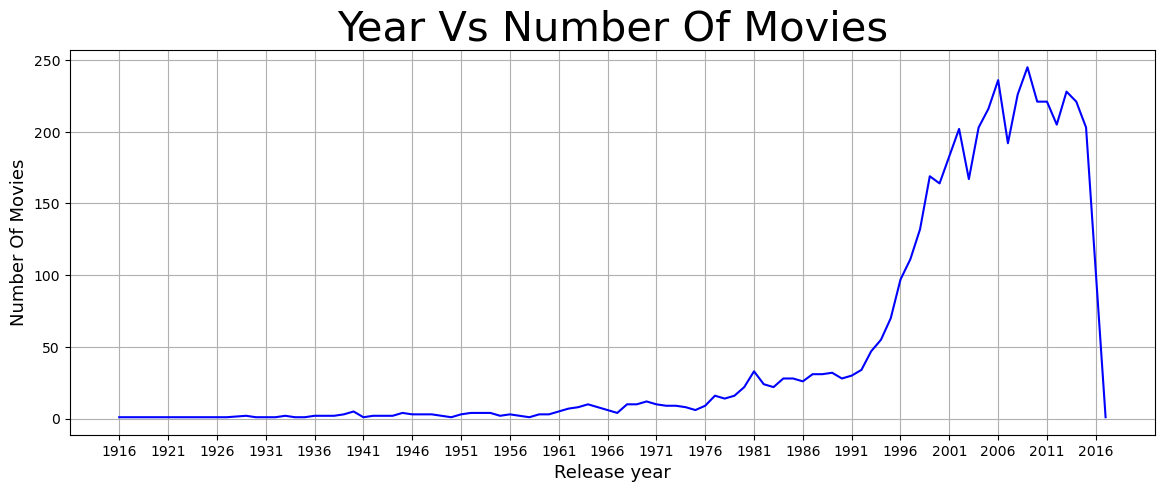

In [19]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df1, color='blue')
plt.title("Year Vs Number Of Movies", fontsize=30)
plt.xlabel('Release year', fontsize=13)
plt.ylabel('Number Of Movies', fontsize=13)
plt.xticks(np.arange(1916, 2017, 5))
plt.grid(True)

# Adding annotations with improved readability
for year, count in df1.items():
    if count % 50 == 0:  # Display annotation for every 50 movies
        plt.text(year, count, str(count), ha='center', va='bottom', fontsize=8)

plt.show()

### Based on the plot and the data, it can be concluded that the year 2008 had the highest number of movie releases.

The trend of movie releases in the United States has shown fluctuations over the years, with an overall upward trajectory. The peak occurred in the late 1930s and early 1940s, with around 250 movies released. Subsequently, there was a decline during the 1950s and 1960s, followed by a notable increase in the 1970s and 1980s. Since the early 1990s, the number of movie releases has remained relatively stable.


### Research Question 2: Which month consistently saw the highest number of movie releases across all years in the dataset?

In [20]:
release_months = data['release_date'].dt.month
monthly_release_counts = release_months.value_counts().sort_index()
monthly_release_counts

release_date
1     373
2     325
3     365
4     343
5     358
6     383
7     359
8     410
9     581
10    464
11    325
12    452
Name: count, dtype: int64

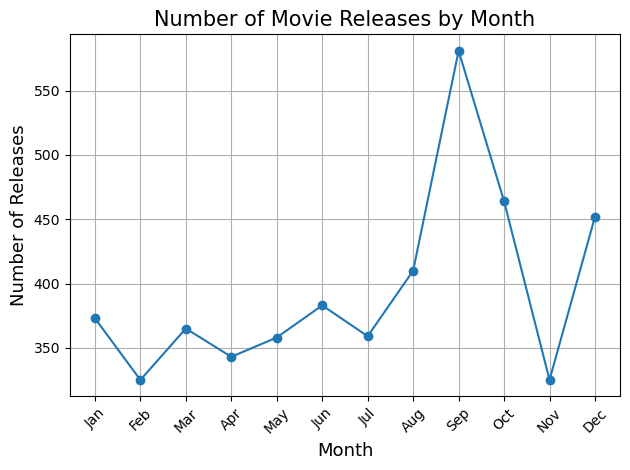

In [23]:
# Define months list
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a DataFrame from number_of_release Series
number_of_release_df = pd.DataFrame({'Month': months, 'Number of Releases': monthly_release_counts.values})

# Plotting
plt.plot(number_of_release_df['Month'], number_of_release_df['Number of Releases'], marker='o', linestyle='-')

# Set labels and title
plt.title('Number of Movie Releases by Month', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Number of Releases', fontsize=13)

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### According to the plot, which illustrates the number of movie releases over months, it's evident that September and October consistently have higher numbers of movie releases compared to other months. This trend might indicate that movie studios strategically choose these months for releasing their films, possibly due to factors such as favorable weather conditions, school holidays, or historical box office performance during these periods. Further analysis could delve into specific reasons behind the popularity of these months for movie releases and their potential impact on box office performance and audience engagement.


### Research Question 3 : What are the titles of the movies with the highest and lowest earned revenue in the dataset?

In [24]:
def find_minmax_revenue(data):
    # Find the index of the movie with the lowest and highest revenue
    min_revenue_index = data['revenue'].idxmin()
    max_revenue_index = data['revenue'].idxmax()
    
    # Get the details of the movies with the lowest and highest revenue
    min_revenue_movie = data.loc[min_revenue_index]
    max_revenue_movie = data.loc[max_revenue_index]
    
    # Create a DataFrame containing details of both movies
    minmax_revenue_df = pd.DataFrame({'Lowest Revenue Movie': min_revenue_movie, 'Highest Revenue Movie': max_revenue_movie})
    
    return minmax_revenue_df

In [25]:
# Call the function to find movies with the highest and lowest revenue
minmax_revenue_df = find_minmax_revenue(data)

# Display the DataFrame with better formatting for easier viewing
minmax_revenue_df.style.set_properties(**{'text-align': 'left'})

,Lowest Revenue Movie,Highest Revenue Movie
budget,27000000,237000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fiction""}, {""id"": 10749, ""name"": ""Romance""}]","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]"
homepage,nan,http://www.avatarmovie.com/
id,79698,19995
keywords,[],"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]"
original_language,en,en
original_title,The Lovers,Avatar
overview,"The Lovers is an epic romance time travel adventure film. Helmed by Roland Joffé from a story by Ajey Jhankar, the film is a sweeping tale of an impossible love set against the backdrop of the first Anglo-Maratha war across two time periods and continents and centred around four characters — a British officer in 18th century colonial India, the Indian woman he falls deeply in love with, an American present-day marine biologist and his wife.","In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization."
popularity,2.418535,150.437577
production_companies,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bliss Media"", ""id"": 8186}, {""name"": ""Limelight International Media Entertainment"", ""id"": 8187}, {""name"": ""Neelmudra Entertainment"", ""id"": 8188}, {""name"": ""Aristos Films"", ""id"": 76098}, {""name"": ""Singularity Productions"", ""id"": 76099}, {""name"": ""Wildkite"", ""id"": 76100}]","[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]"


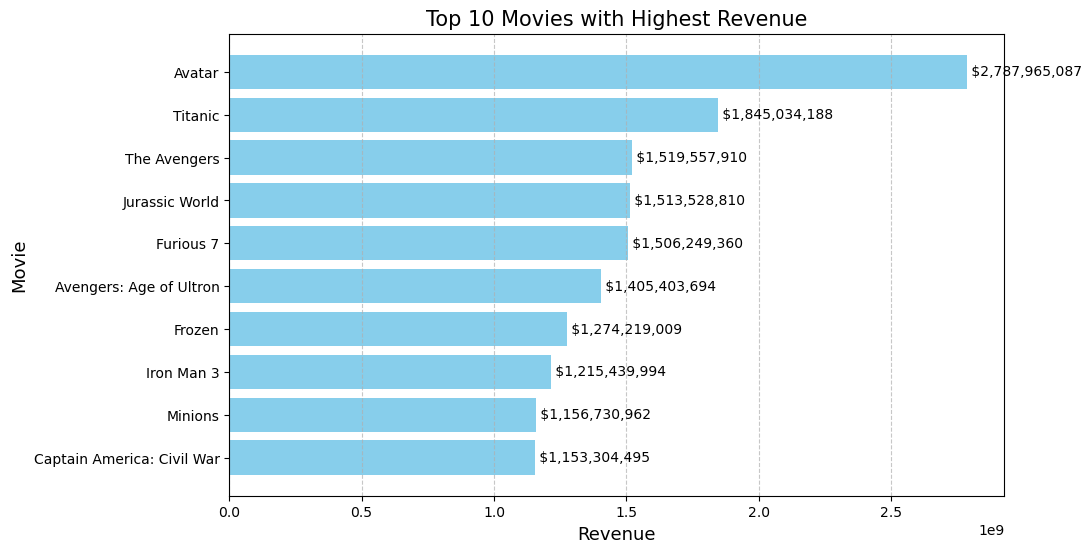

In [26]:
# Sort the 'revenue' column in descending order and store it in a new DataFrame
top_10_revenue = data[['original_title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_revenue['original_title'], top_10_revenue['revenue'], color='skyblue')
plt.xlabel('Revenue', fontsize=13)
plt.ylabel('Movie', fontsize=13)
plt.title('Top 10 Movies with Highest Revenue', fontsize=15)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest revenue movie on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate the bars with revenue values
for index, value in enumerate(top_10_revenue['revenue']):
    plt.text(value, index, f' ${value:,.0f}', fontsize=10, va='center')

# Show plot
plt.show()

### The movie 'Avatar' stands out as the most profitable in the dataset, generating a staggering revenue of over 2.5 billion dollars. On the other hand, 'Titanic' appears to have incurred the largest loss among the movies listed, indicating significant financial setbacks despite its immense popularity. These contrasting outcomes underscore the diverse financial performances within the film industry and highlight the substantial risks involved in movie production.


<a id='conclusions'></a>
## Conclusions

After processing the dataset, several key conclusions can be drawn:
### 1 The year 2008 had the highest number of movie releases.
### 2 September and October consistently recorded the highest number of movie releases throughout the years.
### 3 "Avatar" emerged as the highest-profit-generating movie, with earnings exceeding 2.5 billion dollars, while "The Warrior's Way" experienced the most significant loss.
### 4 "The Warrior's Way" holds the record for the highest budget, whereas "Fear Clinic" has the lowest budget.
### 5 Movies within the 100-200 minute runtime range tend to be more popular, possibly due to audience preferences for shorter durations.
### 6 There appears to be a positive correlation between a movie's popularity and its profit.

Despite the insights gained, it's important to recognize the limitations of the dataset. Inconsistencies such as missing currency units in budget and revenue columns may lead to inaccuracies in comparisons across movies from different production countries. Additionally, the time-consuming process of splitting data into lists during cleaning may have impacted the efficiency of our analysis. These factors should be considered when interpreting the results.

### Limitations

The provided data might have inconsistencies due to: 
1) missing currency units in the budget and revenue columns, potentially causing inaccurate comparisons across movies with different production countries, and 
2) the time-consuming process of splitting data into lists during cleaning, which can impact overall analysis efficiency.


In [27]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

zsh:1: command not found: python
